# Exploratory Data Analysis on High Elo Chess Games Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('enriched_low_elo_games.csv')
df.head()

,white,black,white_elo,black_elo,result,opening,eco,site,time_control,termination,...,black_country,black_title,black_preferred_game,black_peak_bullet,black_peak_blitz,black_peak_rapid,black_peak_classical,black_total_wins,black_total_draws,black_total_losses
0,patatero,hichamsbitri,1334,1320,1-0,Queen's Pawn,A40,https://lichess.org/ivwkDdC3,300+0,Abandoned,...,NaN,NaN,bullet,1970.0,1882.0,NaN,NaN,14140,985,12668
1,Ayman22,daamien,1364,1414,1-0,Caro-Kann Defense: Two Knights Attack,B10,https://lichess.org/OIR2O8JN,300+0,Normal,...,NaN,NaN,bullet,1483.0,1645.0,1717.0,NaN,17909,1247,17945
2,StriderChess,Cory37,1445,1347,1-0,Scandinavian Defense: Mieses-Kotroc Variation,B01,https://lichess.org/s86rLkgu,60+0,Time forfeit,...,NaN,NaN,puzzle,NaN,NaN,NaN,NaN,36,1,66
3,Liamglaz,Sehs7,1309,1062,1-0,French Defense: Normal Variation,C00,https://lichess.org/UNZSyW8V,300+8,Time forfeit,...,NaN,NaN,rapid,NaN,NaN,NaN,NaN,778,66,1682
4,kennethberg,Roja,1431,1210,1-0,King's Pawn Game,C20,https://lichess.org/jpFavxB8,540+12,Normal,...,NaN,NaN,blitz,NaN,904.0,NaN,NaN,1767,127,3350


## Basic Info and Structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   white                 1000 non-null   object 
 1   black                 1000 non-null   object 
 2   white_elo             1000 non-null   int64  
 3   black_elo             1000 non-null   int64  
 4   result                1000 non-null   object 
 5   opening               1000 non-null   object 
 6   eco                   1000 non-null   object 
 7   site                  1000 non-null   object 
 8   time_control          1000 non-null   object 
 9   termination           1000 non-null   object 
 10  white_country         0 non-null      float64
 11  white_title           0 non-null      float64
 12  white_preferred_game  1000 non-null   object 
 13  white_peak_bullet     119 non-null    float64
 14  white_peak_blitz      207 non-null    float64
 15  white_peak_rapid      

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
white,1000,1000,patatero,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black,1000,1000,hichamsbitri,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
white_elo,1000.0,NaN,NaN,NaN,1305.063,146.500278,786.0,1212.25,1317.0,1401.25,1802.0
black_elo,1000.0,NaN,NaN,NaN,1297.997,147.057277,768.0,1199.0,1306.5,1389.0,1760.0
result,1000,3,1-0,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opening,1000,313,Scandinavian Defense: Mieses-Kotroc Variation,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eco,1000,112,C20,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site,1000,1000,https://lichess.org/ivwkDdC3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_control,1000,151,300+0,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
termination,1000,3,Normal,693,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Data Analysis

In [7]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

white_country           1000
white_title             1000
black_country           1000
black_title             1000
black_peak_classical     993
white_peak_classical     986
black_peak_rapid         908
white_peak_rapid         896
white_peak_bullet        881
black_peak_bullet        871
black_peak_blitz         803
white_peak_blitz         793
dtype: int64

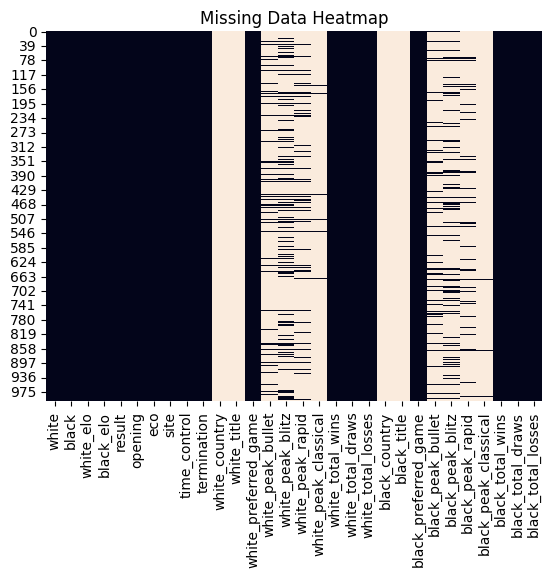

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

## Missing Data Handling

In [9]:
# Drop columns with 30% or lower non-null values (70% or more missing)
threshold = 0.30
df_cleaned = df.dropna(thresh=int(threshold * len(df)), axis=1)

# Check the shape after dropping the columns
print(f"Shape after dropping columns: {df_cleaned.shape}")

Shape after dropping columns: (1000, 18)


## Distribution of Elo Ratings

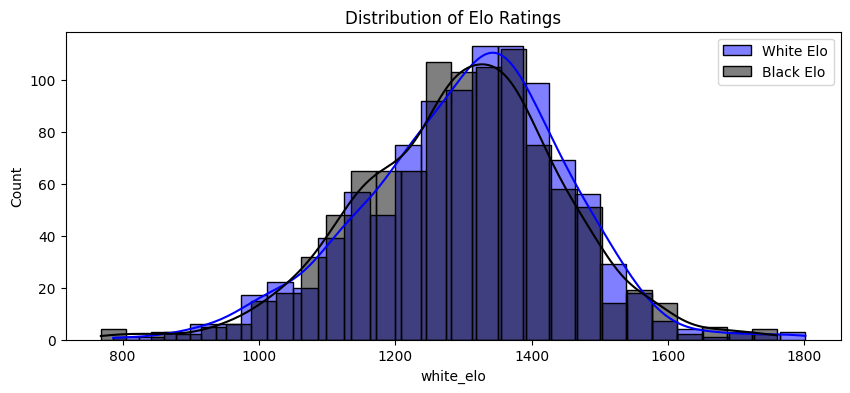

In [10]:
plt.figure(figsize=(10, 4))
sns.histplot(df_cleaned['white_elo'], kde=True, color='blue', label='White Elo')
sns.histplot(df_cleaned['black_elo'], kde=True, color='black', label='Black Elo')
plt.legend()
plt.title('Distribution of Elo Ratings')
plt.show()

## Echo Analysis for Avg. Total game

In [11]:
# Compute total games and win rate for white
df['white_total_games'] = df['white_total_wins'] + df['white_total_draws'] + df['white_total_losses']
df['white_win_rate'] = df['white_total_wins'] / df['white_total_games']

# Compute total games and win rate for black
df['black_total_games'] = df['black_total_wins'] + df['black_total_draws'] + df['black_total_losses']
df['black_win_rate'] = df['black_total_wins'] / df['black_total_games']

# Handle division by zero and missing data (median imputation)
white_median_games = df[df['white_total_games'] > 0]['white_total_games'].median()
black_median_games = df[df['black_total_games'] > 0]['black_total_games'].median()

white_median_win_rate = df[df['white_total_games'] > 0]['white_win_rate'].median()
black_median_win_rate = df[df['black_total_games'] > 0]['black_win_rate'].median()

# Impute
df['white_total_games'] = df['white_total_games'].replace(0, white_median_games)
df['white_win_rate'] = df['white_win_rate'].fillna(white_median_win_rate)

df['black_total_games'] = df['black_total_games'].replace(0, black_median_games)
df['black_win_rate'] = df['black_win_rate'].fillna(black_median_win_rate)

# Cell 4: Compute average experience per game (combined)
df['avg_total_games'] = (df['white_total_games'] + df['black_total_games']) / 2

# Cell 5: Top ECO codes by average player experience
top_eco_experience = (
    df.groupby(['eco', 'opening'])['avg_total_games']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Display top 10 ECO codes by average player experience
top_eco_experience.head(20)

,eco,opening,avg_total_games
0,B22,Sicilian Defense: Alapin Variation,60178.75
1,C00,St. George Defense,38074.50
2,D35,Queen's Gambit Declined: Normal Defense,37435.50
3,C21,Center Game,36971.00
4,B12,"Caro-Kann Defense: Advance Variation, Short Va...",31503.00
5,B10,Caro-Kann Defense: Two Knights Attack,30881.00
6,C25,Vienna Game: Max Lange Defense,29328.00
7,D30,Queen's Gambit Declined,29303.50
8,D00,Blackmar-Diemer Gambit,29250.25
9,B94,Sicilian Defense: Najdorf Variation,28906.50


## Preferred Game Types

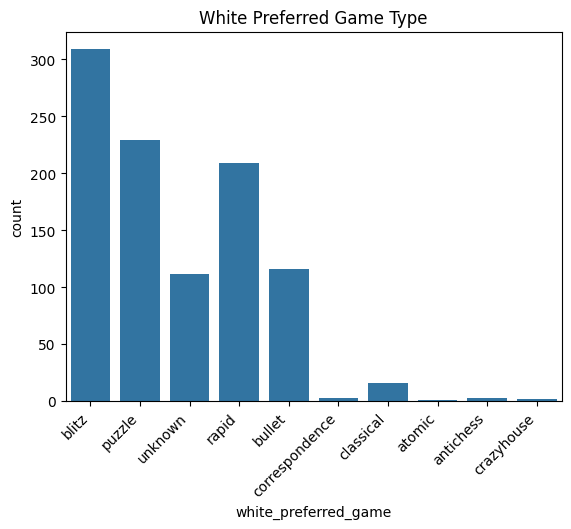

In [12]:
sns.countplot(x='white_preferred_game', data=df_cleaned)
plt.title('White Preferred Game Type')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees for better readability
plt.show()

## Game Result Distribution

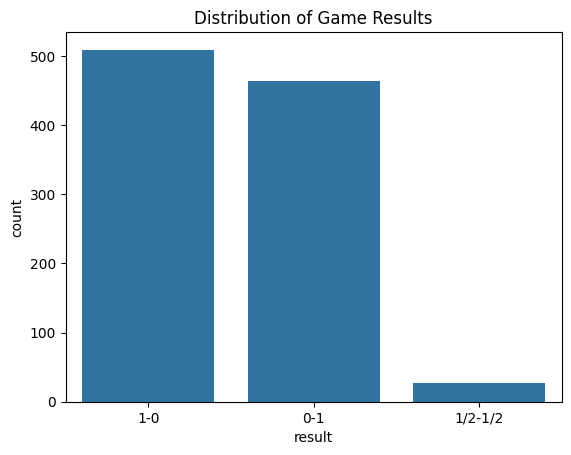

In [13]:
sns.countplot(x='result', data=df_cleaned)
plt.title('Distribution of Game Results')
plt.show()

## Opening Analysis

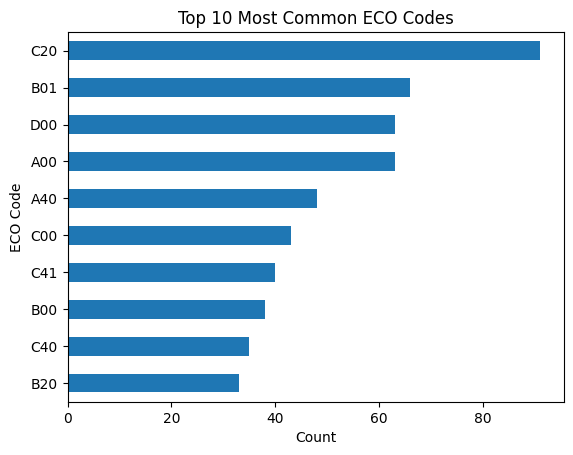

In [14]:
# Get the top 10 most common ECO codes
top_eco = df_cleaned['eco'].value_counts().head(10)

# Plot the top 10 most common ECO codes
top_eco.plot(kind='barh')
plt.title('Top 10 Most Common ECO Codes')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('ECO Code')
plt.show()

## Elo vs Game Result

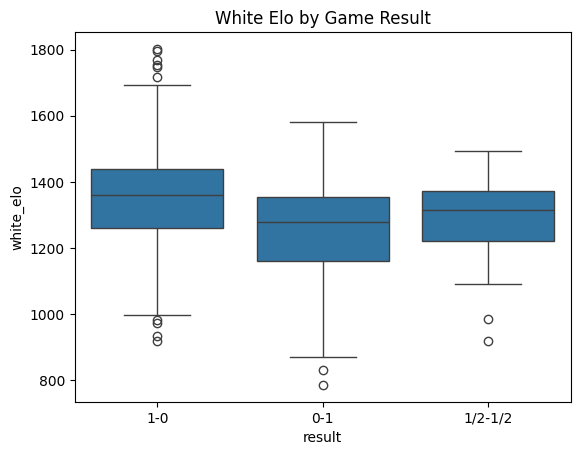

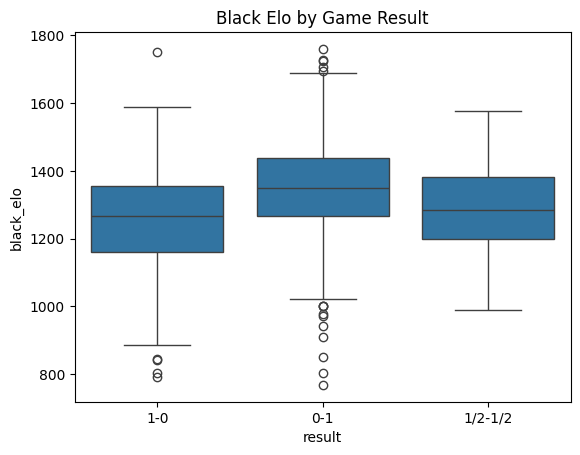

In [15]:
sns.boxplot(x='result', y='white_elo', data=df_cleaned)
plt.title('White Elo by Game Result')
plt.show()

sns.boxplot(x='result', y='black_elo', data=df_cleaned)
plt.title('Black Elo by Game Result')
plt.show()

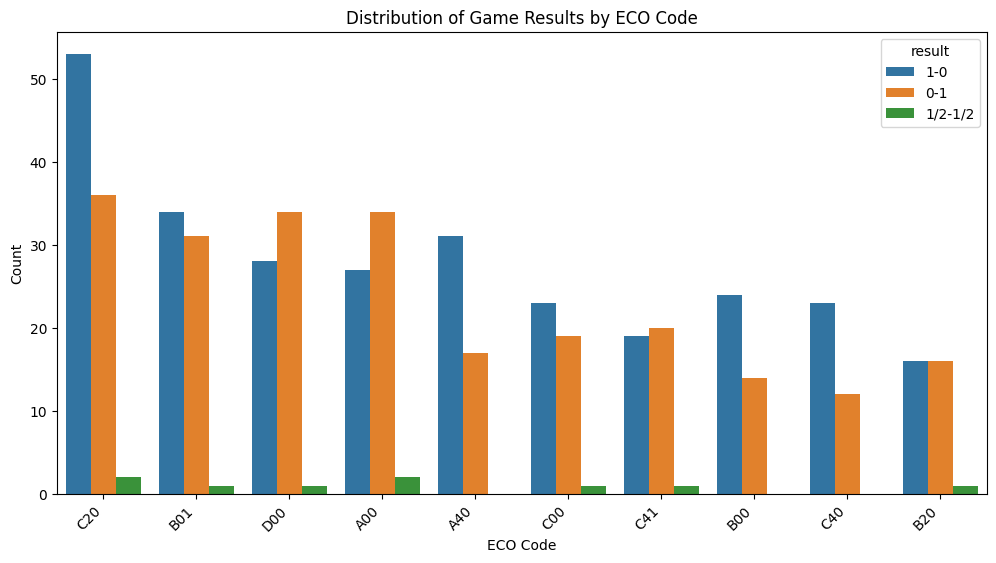

In [16]:
# Get the top 10 most common ECO codes
top_eco = df_cleaned['eco'].value_counts().head(10)

# Create a new DataFrame that only includes the top 10 ECO codes
top_eco_df = df_cleaned[df_cleaned['eco'].isin(top_eco.index)]

# Plot the distribution of results for these ECO codes
plt.figure(figsize=(12, 6))
sns.countplot(x='eco', hue='result', data=top_eco_df, order=top_eco.index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Game Results by ECO Code')
plt.xlabel('ECO Code')
plt.ylabel('Count')
plt.show()